In [22]:
#Testing column: He/H
#Bulge vs Thin Disc
#Number of data points - Bulge: 465, Thin Disc: 1202
#Mean1: -0.6727, Std1: 0.4242
#Mean2: -0.6454, Std2: 0.3877
#KS Test İstatistiği: 0.0338
#P Değeri: 0.8643
        
import numpy as np
from scipy import stats

# Örnek veri setleri
data1 = np.random.normal(-0.6727, 0.4242, 465)  # Ortalama -0.6727, standart sapma 0.4242
data2 = np.random.normal(-0.6454, 0.3877, 1202)  # Ortalama -0.6454, standart sapma 0.3877

       
        
# Kolmogorov-Smirnov Testi
ks_statistic, ks_p_value = stats.ks_2samp(data1, data2)
print(f"KS Test İstatistiği: {ks_statistic}")
print(f"KS P Değeri: {ks_p_value}")

if ks_p_value < 0.05:
    print("Veri setleri arasında istatistiksel olarak anlamlı bir fark vardır (KS Testi).")
else:
    print("Veri setleri arasında istatistiksel olarak anlamlı bir fark yoktur (KS Testi).")


KS Test İstatistiği: 0.10062798561537223
KS P Değeri: 0.0020561435091125376
Veri setleri arasında istatistiksel olarak anlamlı bir fark vardır (KS Testi).


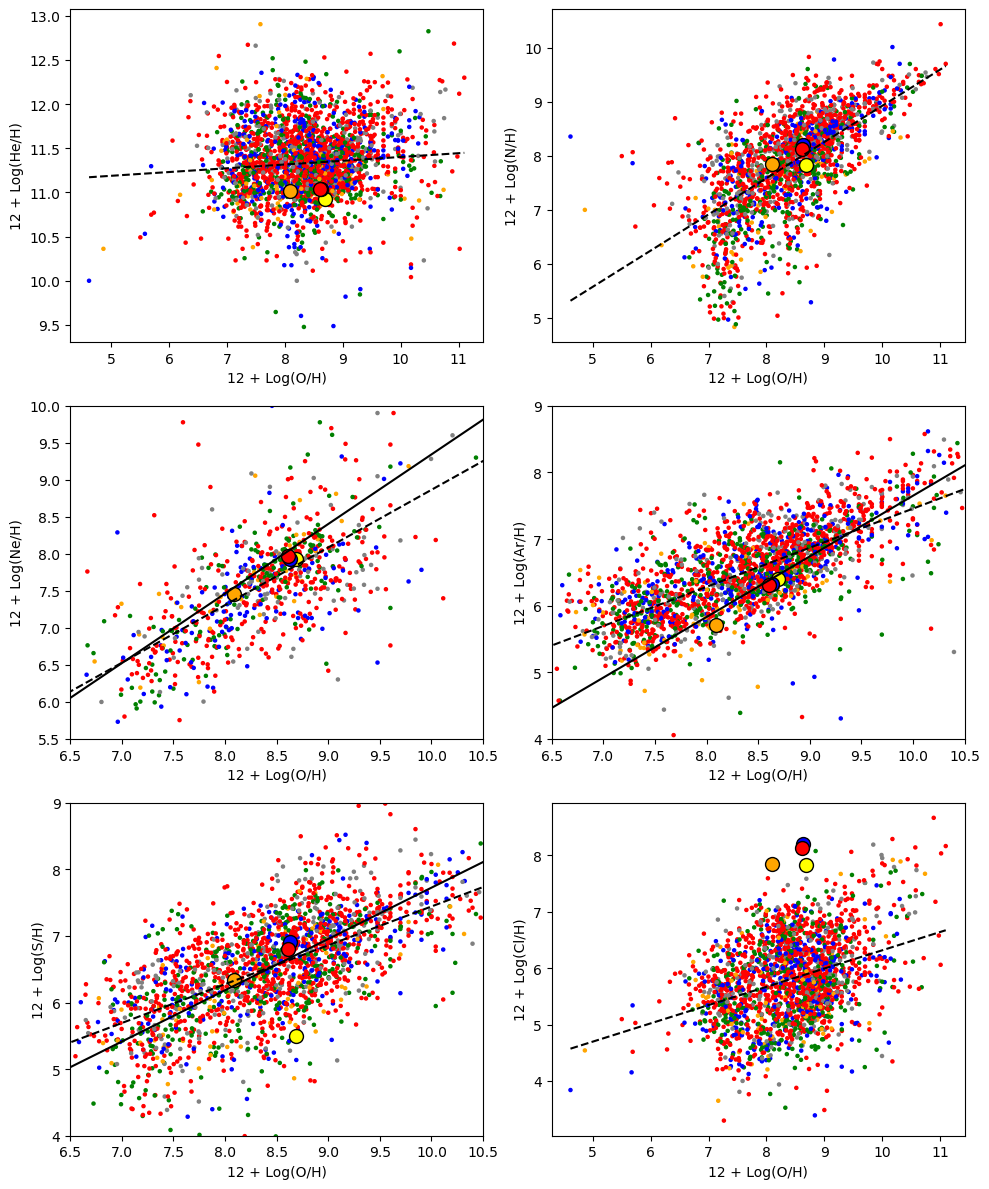

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress
import os

# Excel dosyasını oku
dosya_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
sayfa_adi = "Total_abundance"
data = pd.read_excel(dosya_yolu, sheet_name=sayfa_adi)

# Sütun başlıklarıyla birlikte verileri al
He_H = data["He/H"] + 12.0
N_H = data["N/H"] + 12.0
O_H = data["O/H"] + 12.0
Ne_H = data["Ne/H"] + 12.0
Ar_H = data["Ar/H"] + 12.0
S_H = data["S/H"] + 12.0
Cl_H = data["Cl/H"] +12.0

# Solar, disk, bulge ve halo değerleri
sol = [-1.07, -4.17, -3.31, -4.07, -5.6, -4.88, -6.50]
disk = [-0.96, -3.87, -3.39, -4.03, -5.69, -5.20]
bulge = [-0.96, -3.80, -3.37, -4.07, -5.68, -5.09]
halo = [-0.98, -4.15, -3.91, -4.54, -6.29, -5.66]

# Renk haritası oluştur
color_map = {
    'Bulge': 'blue',
    'Thin Disc': 'red',
    'Thick Disk': 'green',
    'Halo': 'orange',
    'no distance': 'grey',
    'no data': 'black'
}

# Veri noktaları için renkleri belirle
colors = data['Gbileşen'].map(color_map)

# Trend çizgisi ve R^2 değerlerini kaydetmek için liste
trend_info = []
component_trend_info = []

# Trend çizgisi eklemek için yardımcı fonksiyon
def add_trend_line(ax, x_data, y_data, label):
    mask = np.isfinite(x_data) & np.isfinite(y_data)
    x_data_clean = x_data[mask]
    y_data_clean = y_data[mask]
    
    if len(x_data_clean) > 1:
        # Linear regression with standard error
        slope, intercept, r_value, p_value, std_err = linregress(x_data_clean, y_data_clean)
        
        x_values = np.linspace(min(x_data_clean), max(x_data_clean), 100)
        y_values = slope * x_values + intercept
        ax.plot(x_values, y_values, color='black', linestyle='--')
        
        # Calculate confidence intervals
        n = len(x_data_clean)
        t = 2.306  # 95% confidence interval for large sample sizes (df > 30)
        slope_ci = t * std_err
        intercept_ci = t * std_err * np.sqrt(np.sum((x_data_clean - np.mean(x_data_clean))**2) / n)
        
        trend_info.append(f"{label}: y = ({intercept:.4f} ± {intercept_ci:.4f}) + ({slope:.4f} ± {slope_ci:.4f})x, R^2 = {r_value**2:.4f}, n = {n}")

# Her bileşen için trend çizgisi hesaplamak için yardımcı fonksiyon
def calculate_component_trend(x_data, y_data, component, label):
    mask = (data['Gbileşen'] == component) & np.isfinite(x_data) & np.isfinite(y_data)
    x_data_clean = x_data[mask]
    y_data_clean = y_data[mask]
    
    if len(x_data_clean) > 1:
        # Linear regression with standard error
        slope, intercept, r_value, p_value, std_err = linregress(x_data_clean, y_data_clean)
        
        # Calculate confidence intervals
        n = len(x_data_clean)
        t = 2.306  # 95% confidence interval for large sample sizes (df > 30)
        slope_ci = t * std_err
        intercept_ci = t * std_err * np.sqrt(np.sum((x_data_clean - np.mean(x_data_clean))**2) / n)
        
        component_trend_info.append(f"{label} ({component}): y = ({intercept:.4f} ± {intercept_ci:.4f}) + ({slope:.4f} ± {slope_ci:.4f})x, R^2 = {r_value**2:.4f}, n = {n}")

# Grafik oluştur
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

#####################     He     #####################
axs[0, 0].scatter(O_H, He_H, color=colors, s=5)
axs[0, 0].set_xlabel('12 + Log(O/H)')
axs[0, 0].set_ylabel('12 + Log(He/H)')
axs[0, 0].scatter(sol[2] + 12.0, sol[0] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[0, 0].scatter(bulge[2] + 12.0, bulge[0] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[0, 0].scatter(disk[2] + 12.0, disk[0] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[0, 0].scatter(halo[2] + 12.0, halo[0] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[0, 0], O_H, He_H, 'He vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, He_H, component, 'He vs O')

#####################     N     #####################
axs[0, 1].scatter(O_H, N_H, color=colors, s=5)
axs[0, 1].set_xlabel('12 + Log(O/H)')
axs[0, 1].set_ylabel('12 + Log(N/H)')
axs[0, 1].scatter(sol[2] + 12.0, sol[1] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[0, 1].scatter(bulge[2] + 12.0, bulge[1] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[0, 1].scatter(disk[2] + 12.0, disk[1] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[0, 1].scatter(halo[2] + 12.0, halo[1] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[0, 1], O_H, N_H, 'N vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, N_H, component, 'N vs O')

#####################     Ne     #####################
m = 0.94
b = -0.056
x_values = np.linspace(6.5, 10.5, 100)
y_values = m * x_values + b
axs[1, 0].plot(x_values, y_values, color='black', linestyle='solid')
axs[1, 0].scatter(O_H, Ne_H, color=colors, s=5)
axs[1, 0].set_xlabel('12 + Log(O/H)')
axs[1, 0].set_ylabel('12 + Log(Ne/H)')
axs[1, 0].set_ylim(5.5, 10.0)
axs[1, 0].set_xlim(6.5, 10.5)
axs[1, 0].scatter(sol[2] + 12.0, sol[3] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[1, 0].scatter(bulge[2] + 12.0, bulge[3] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[1, 0].scatter(disk[2] + 12.0, disk[3] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[1, 0].scatter(halo[2] + 12.0, halo[3] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[1, 0], O_H, Ne_H, 'Ne vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, Ne_H, component, 'Ne vs O')

#####################     Ar     #####################
m = 0.91
b = -1.45
x_values = np.linspace(6.5, 10.5, 100)
y_values = m * x_values + b
axs[1, 1].plot(x_values, y_values, color='black', linestyle='solid')
axs[1, 1].scatter(O_H, Ar_H, color=colors, s=5)
axs[1, 1].set_xlabel('12 + Log(O/H)')
axs[1, 1].set_ylabel('12 + Log(Ar/H)')
axs[1, 1].set_ylim(4, 9.0)
axs[1, 1].set_xlim(6.5, 10.5)
axs[1, 1].scatter(sol[2] + 12.0, sol[4] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[1, 1].scatter(bulge[2] + 12.0, bulge[4] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[1, 1].scatter(disk[2] + 12.0, disk[4] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[1, 1].scatter(halo[2] + 12.0, halo[4] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[1, 1], O_H, Ar_H, 'Ar vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, Ar_H, component, 'Ar vs O')

#####################     S     #####################
m = 0.77
b = 0.024
x_values = np.linspace(6.5, 10.5, 100)
y_values = m * x_values + b
axs[2, 0].plot(x_values, y_values, color='black', linestyle='solid')
axs[2, 0].scatter(O_H, S_H, color=colors, s=5)
axs[2, 0].set_xlabel('12 + Log(O/H)')
axs[2, 0].set_ylabel('12 + Log(S/H)')
axs[2, 0].set_ylim(4, 9.0)
axs[2, 0].set_xlim(6.5, 10.5)
axs[2, 0].scatter(sol[2] + 12.0, sol[5] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[2, 0].scatter(bulge[2] + 12.0, bulge[5] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[2, 0].scatter(disk[2] + 12.0, disk[5] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[2, 0].scatter(halo[2] + 12.0, halo[5] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[2, 0], O_H, S_H, 'S vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, S_H, component, 'S vs O')

#####################     Cl     #####################     
axs[2, 1].scatter(O_H, Cl_H, color=colors, s=5)
axs[2, 1].set_xlabel('12 + Log(O/H)')
axs[2, 1].set_ylabel('12 + Log(Cl/H)')
axs[2, 1].scatter(sol[2] + 12.0, sol[1] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[2, 1].scatter(bulge[2] + 12.0, bulge[1] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[2, 1].scatter(disk[2] + 12.0, disk[1] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[2, 1].scatter(halo[2] + 12.0, halo[1] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[2, 1], O_H, Cl_H, 'Cl vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, Cl_H, component, 'Cl vs O')

# Grafik ayarları
plt.tight_layout()
plt.savefig('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/hash/Total_abun.pdf')   # save the figure to file
plt.show()

output_dir = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/hash/'
trend_info_file = os.path.join(output_dir, 'trend_info.txt')

with open(trend_info_file, 'w') as file:
    file.write("Trend Line Information:\n")
    for info in trend_info:
        file.write(info + "\n")

    file.write("\nComponent-wise Trend Line Information:\n")
    for info in component_trend_info:
        file.write(info + "\n")